# Determining if a tweet is toxic or not



It is required to create a binary classification model that, based on the input text, will determine it as toxic or normal

In [3]:
import numpy as np
import pandas as pd
import torch
import transformers
from tqdm.notebook import tqdm, trange
import re

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from nltk.corpus import stopwords

nltk.download('wordnet')

from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexey_zalesov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexey_zalesov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/toxic_comments.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
data['text'] = data['text'].str.lower()
data = data.replace(r'\n',' ', regex=True) 


data.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d'aww! he matches this background colour i'm s...,0
2,"hey man, i'm really not trying to edit war. it...",0
3,""" more i can't make any real suggestions on im...",0
4,"you, sir, are my hero. any chance you remember...",0


In [7]:
corpus = data['text'].values
print(corpus)


["explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27"
 "d'aww! he matches this background colour i'm seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)"
 "hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info."
 ...
 'spitzer   umm, theres no actual article for prostitution ring.  - crunch captain.'
 'and it looks like it was actually you who put on the speedy to have the first version deleted now that i look at it.'
 '" and ... i really don\'t think you understand.  i came here and my idea was bad right away.  what kind of community goes ""you have bad ideas"" go away, instead of he

In [8]:
lemmas = []

stemmer = WordNetLemmatizer()

for sentance in tqdm(range(0, len(corpus))):
    # Удаляем все специальные символы
    tweet = re.sub(r'\W', ' ', str(corpus[sentance]))
    
    # Заменяем несколько пробелов на один
    tweet = re.sub(r'\s+', ' ', tweet)
    
    
    # Лемматизация
    tweet = tweet.split()
    tweet = [stemmer.lemmatize(i) for i in tweet]
    tweet = ' '.join(tweet)
    
    lemmas.append(tweet)


In [9]:
lemmas = pd.Series(lemmas, name='lemmas')
data_cleared = pd.concat([data, lemmas], axis=1)

In [10]:
features = data_cleared['lemmas']
target = data_cleared['toxic']





stop_words = set(stopwords.words('english'))
tfid = TfidfVectorizer(stop_words= stop_words)



In [11]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, 
                                                                                        target, test_size=0.2)

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid,
                                                                              target_train_valid, 
                                                                              test_size=0.25)

In [13]:
print(features_train.shape,features_valid.shape, target_train.shape )

(95742,) (31914,) (95742,)


In [14]:
tfid.fit(features_train)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [15]:
features_train_trans = tfid.transform(features_train)

features_valid_transform = tfid.transform(features_valid)

features_test_transform = tfid.transform(features_test)

In [16]:
print(features_train_trans.shape, features_valid_transform.shape, features_test_transform.shape)

(95742, 131519) (31914, 131519) (31915, 131519)


In [17]:
# depths={}


# for depth in tqdm(range(3,100)):

#     model = RandomForestClassifier(n_jobs=-1, max_depth=depth,)
#     model.fit(features_train_trans, target_train)
#     predictions = model.predict(features_valid_transform)
    
#     score = f1_score(target_valid, predictions)
#     depths.update({depth:score})




In [18]:
# best_depth = max(depths, key = depths.get)
# print(best_depth)

In [19]:
# n_estimators_dict = {}

# for n_estimator in tqdm(range(7,200)):
#     model = RandomForestClassifier(n_jobs=-1, max_depth=best_depth, n_estimators=n_estimator)
    
#     model.fit(features_train_trans, target_train)
#     predictions = model.predict(features_valid_transform)
    
#     score = f1_score(target_valid, predictions)
#     n_estimators_dict.update({n_estimator:score})

In [20]:
# best_number_of_estimators = max(n_estimators_dict, key = n_estimators_dict.get)
# print(best_number_of_estimators)

In [21]:
# #leaves = {}

# #for min_leaves in tqdm(range(2,20)):
# #    model = RandomForestClassifier(n_jobs=-1, max_depth=best_depth, 
# #                                   n_estimators=best_number_of_estimators, min_samples_split = min_leaves)
    
#     model.fit(features_train_trans, target_train)
#     predictions = model.predict(features_valid_transform)
    
#     score = f1_score(target_valid, predictions)
#     leaves.update({min_leaves:score})

In [22]:
# best_split_number = max(leaves, key = leaves.get)
# print(best_split_number)

In [23]:
model_RF_final = RandomForestClassifier(n_jobs=-1, max_depth=99, 
                                   n_estimators=3,
                                        min_samples_split = 17)

model_RF_final.fit(features_train_trans, target_train)
predictions = model_RF_final.predict(features_valid_transform)

score = f1_score(target_valid, predictions)

print(score)

0.2852760736196319


Despite using the selected hyperparameters, the random forest did not perform well enough. 

In [24]:
model_LR =  LogisticRegression(n_jobs=-1)
model_LR.fit(features_train_trans, target_train)
predictions = model_LR.predict(features_valid_transform)

score = f1_score(target_valid, predictions)
print(score)

0.7161572052401747


Already a good result, we will try to improve it

In [25]:
def grid_search(model, params, features, target):
    
    search = GridSearchCV(model, params, verbose=1, cv=5, scoring='f1', n_jobs=-1)
    search.fit(features, target)
    
    print(search.best_score_)
    print(search.best_params_)  

In [26]:
model_LR = LogisticRegression(random_state=12345)

model_LR_params = dict(C = [0.1,1,10,100], 
                 tol = [1e-03, 1e-04, 1e-05])

In [27]:
tqdm(grid_search(model_LR, model_LR_params, features_train_trans, target_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.2min finished


0.7537017784053474
{'C': 10, 'tol': 0.001}


/Users/alexey_zalesov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0it [00:00, ?it/s]

In [28]:
model_LR_final = LogisticRegression(C=10, tol=0.0001)

model_LR_final.fit(features_train_trans, target_train)

predictions = model_LR_final.predict(features_valid_transform)
score = f1_score(target_valid, predictions)
print('F1-мера на валидационной выборке:', score)

predictions = model_LR_final.predict(features_test_transform)
score = f1_score(target_test, predictions)

print('F1-мера на тестовой выборке:', score)


# model_report(lr_final, X_valid_tf, y_valid)


F1-мера на валидационной выборке: 0.7675263977843171
F1-мера на тестовой выборке: 0.7684627302461698


/Users/alexey_zalesov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


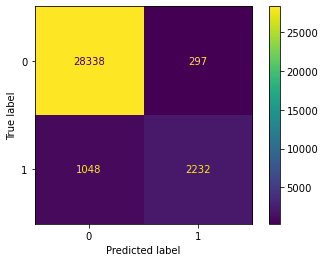

In [29]:
plot_confusion_matrix(model_LR_final,  features_test_transform, target_test)  
plt.show()

A passing score on both the validation and test sets, but a fairly large number of false positive model predictions.

# Conclusion

The data has been loaded, cleaned, lemmatized and represented as vectors using tfidfVectorizer(). Hyperparameters were selected for the Random Forest Classifier, but despite this, the required F1-measure threshold was not reached. A logistic regression model was also trained, hyperparameters were selected and the required result was obtained.